In [191]:
import pandas as pd
import glob
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [192]:
dfs = []
for f in glob.glob('may_3rd_sweep_complaint*'):
    print(f)
    df=pd.read_csv(f)
    dfs.append(df)

may_3rd_sweep_complaint_ratio_2023-05-04-03-13-02
may_3rd_sweep_complaint_ratio_2023-05-04-03-47-27
may_3rd_sweep_complaint_ratio_2023-05-04-04-21-13
may_3rd_sweep_complaint_ratio_2023-05-04-04-55-07
may_3rd_sweep_complaint_ratio_2023-05-04-05-29-44


In [193]:
df = pd.concat(dfs)
df['user_input_cnt']=df['num_complaints']+df['confirmation_cnt']
l = ['strat',
 'runtime',
 'avg_tree_size_increase',
 'user_input_cnt',
 'num_complaints',
 'confirmation_cnt',
 'global_accuracy',
 'fix_rate',
 'confirm_preserve_rate',
 'new_global_accuracy',
 'prev_signaled_cnt',
 'new_signaled_cnt']
df[l].sort_values(['user_input_cnt','num_complaints','strat'])[['user_input_cnt','num_complaints',\
                                                                'strat','global_accuracy','new_global_accuracy']]

,user_input_cnt,num_complaints,strat,global_accuracy,new_global_accuracy
1,10,0,information gain,0.76,0.730
1,10,0,information gain,0.76,0.747
1,10,0,information gain,0.76,0.716
1,10,0,information gain,0.76,0.739
1,10,0,information gain,0.76,0.726
0,10,0,naive,0.76,0.730
0,10,0,naive,0.76,0.747
0,10,0,naive,0.76,0.716
0,10,0,naive,0.76,0.739
0,10,0,naive,0.76,0.720


In [194]:
df_aggs = df.groupby(['strat','user_input_cnt','num_complaints']).mean().reset_index()

In [195]:
df_aggs['complaint_ratio'] = df_aggs['num_complaints']/df_aggs['user_input_cnt']

In [196]:
len(df)

660

In [197]:
df_aggs['user_input_cnt'].unique()

array([ 10,  20,  40,  80, 160, 240])

In [200]:
df_aggs[(df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7]))].sort_values(['user_input_cnt','num_complaints','strat'])[['user_input_cnt','num_complaints',\
                                                                'avg_tree_size_increase','strat','global_accuracy','new_global_accuracy']]

,user_input_cnt,num_complaints,avg_tree_size_increase,strat,global_accuracy,new_global_accuracy
3,10,3,0.711111,information gain,0.76,0.7358
69,10,3,1.022222,naive,0.76,0.7358
5,10,5,0.622222,information gain,0.76,0.6478
71,10,5,1.066667,naive,0.76,0.7664
7,10,7,0.444444,information gain,0.76,0.5878
73,10,7,0.844444,naive,0.76,0.6668
14,20,6,1.333333,information gain,0.76,0.7326
80,20,6,2.311111,naive,0.76,0.7532
16,20,10,1.600000,information gain,0.76,0.7486
82,20,10,3.244444,naive,0.76,0.7690


In [198]:
df_aggs.sort_values(['user_input_cnt','num_complaints','strat'])[['user_input_cnt','num_complaints',\
                                                                'strat','global_accuracy','new_global_accuracy','fix_rate']]

,user_input_cnt,num_complaints,strat,global_accuracy,new_global_accuracy,fix_rate
0,10,0,information gain,0.76,0.7316,1.0000
66,10,0,naive,0.76,0.7304,1.0000
1,10,1,information gain,0.76,0.7476,0.2000
67,10,1,naive,0.76,0.7402,0.4000
2,10,2,information gain,0.76,0.7626,0.7000
68,10,2,naive,0.76,0.7428,0.9000
3,10,3,information gain,0.76,0.7358,0.7332
69,10,3,naive,0.76,0.7358,0.7332
4,10,4,information gain,0.76,0.7644,0.2500
70,10,4,naive,0.76,0.7576,0.6500


Text(0.3, 0.5, 'input#=240 info gain')

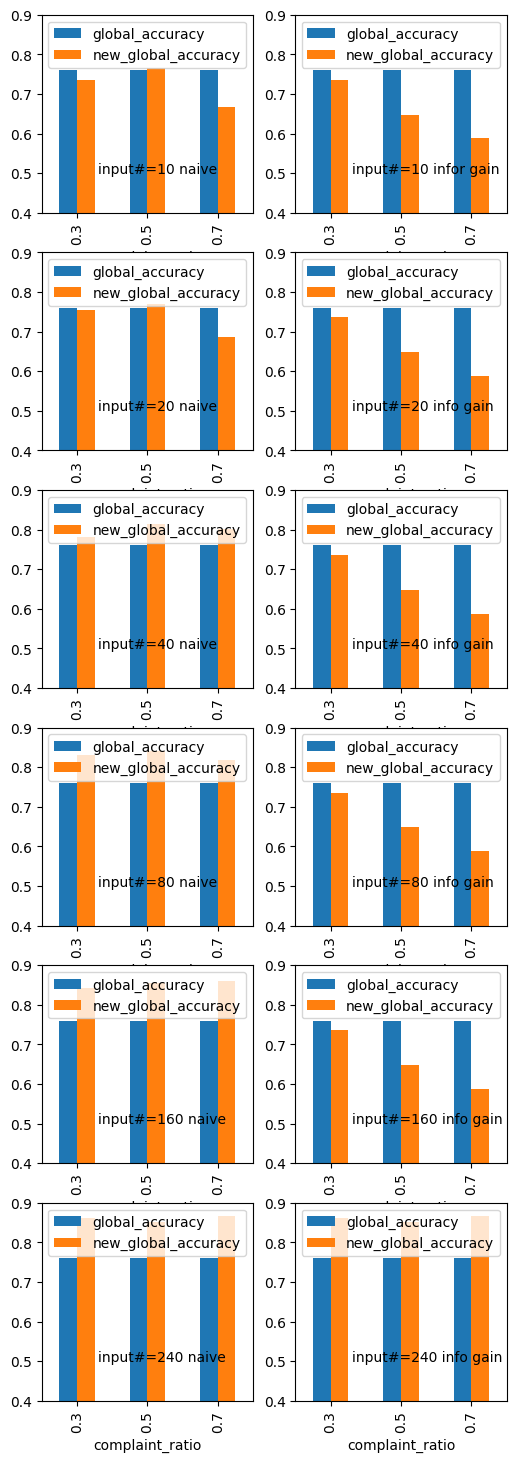

In [199]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(6,18))

#add DataFrames to subplots
# for size in [10, 20, 40, 80, 160, 240]:
df_aggs[(df_aggs['strat']=='naive') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==10)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar", ylim=(0.4,0.9), ax=axes[0,0])
axes[0,0].text(0.3,0.5,'input#=10 naive')
df_aggs[(df_aggs['strat']=='information gain') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==10)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar", ylim=(0.4,0.9), ax=axes[0,1])
axes[0,1].text(0.3,0.5,'input#=10 infor gain')

df_aggs[(df_aggs['strat']=='naive') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==20)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar", ylim=(0.4,0.9), ax=axes[1,0])
axes[1,0].text(0.3,0.5,'input#=20 naive')
df_aggs[(df_aggs['strat']=='information gain') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==10)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar", ylim=(0.4,0.9), ax=axes[1,1])
axes[1,1].text(0.3,0.5,'input#=20 info gain')

df_aggs[(df_aggs['strat']=='naive') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==40)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar", ylim=(0.4,0.9), ax=axes[2,0])
axes[2,0].text(0.3,0.5,'input#=40 naive')
df_aggs[(df_aggs['strat']=='information gain') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==10)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar", ylim=(0.4,0.9), ax=axes[2,1])
axes[2,1].text(0.3,0.5,'input#=40 info gain')

df_aggs[(df_aggs['strat']=='naive') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==80)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar", ylim=(0.4,0.9), ax=axes[3,0])
axes[3,0].text(0.3,0.5,'input#=80 naive')
df_aggs[(df_aggs['strat']=='information gain') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==10)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar", ylim=(0.4,0.9), ax=axes[3,1])
axes[3,1].text(0.3,0.5,'input#=80 info gain')

df_aggs[(df_aggs['strat']=='naive') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==160)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar", ylim=(0.4,0.9), ax=axes[4,0])
axes[4,0].text(0.3,0.5,'input#=160 naive')
df_aggs[(df_aggs['strat']=='information gain') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==10)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar", ylim=(0.4,0.9), ax=axes[4,1])
axes[4,1].text(0.3,0.5,'input#=160 info gain')

df_aggs[(df_aggs['strat']=='naive') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==240)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar",ylim=(0.4,0.9),  ax=axes[5,0])
axes[5,0].text(0.3,0.5,'input#=240 naive')
df_aggs[(df_aggs['strat']=='naive') & (df_aggs['complaint_ratio'].isin([0.3, 0.5, 0.7])) & (df_aggs['user_input_cnt']==240)].plot(x="complaint_ratio", y=["global_accuracy", "new_global_accuracy"], kind="bar",ylim=(0.4,0.9),  ax=axes[5,1])
axes[5,1].text(0.3,0.5,'input#=240 info gain')